In [11]:
import pickle
import pathlib

import matplotlib.pyplot as plt
import numpy as np

In [17]:
lidar_paths = sorted(list(pathlib.Path('data/lidar').iterdir()))
oak_paths = sorted(list(pathlib.Path('data/oak').iterdir()))
imu_paths = sorted(list(pathlib.Path('data/imu').iterdir()))

In [13]:
def lidar_to_3d_homogeneous_matrix(lidar_data):
    ranges = np.array(lidar_data['ranges'])
    thetas = np.arange(lidar_data['angle_min'], lidar_data['angle_max']+lidar_data['angle_increment'], lidar_data['angle_increment'])
    xs = ranges * np.cos(thetas[:len(ranges)])
    ys = ranges * np.sin(thetas[:len(ranges)])
    
    pts = np.vstack((xs, ys, np.zeros(xs.shape), np.ones(xs.shape))).T
    
    # Remove the points that are at the origin.
    pts = pts[np.nonzero(np.logical_or(pts[:,0] != 0., pts[:,1] != 0.))]
    
    return pts

def plot_point_clouds(pcls):
    STYLES = ['r+', 'bx', 'g*', 'md', 'ys']
    
    for i, pcl in enumerate(pcls):
        plt.plot(pcl[:,0], pcl[:,1], STYLES[i], label='Nuage {}'.format(i))
        plt.plot([0.0], [0.0], 'ko')
        
    plt.axis('equal')
    plt.legend()
    plt.show()

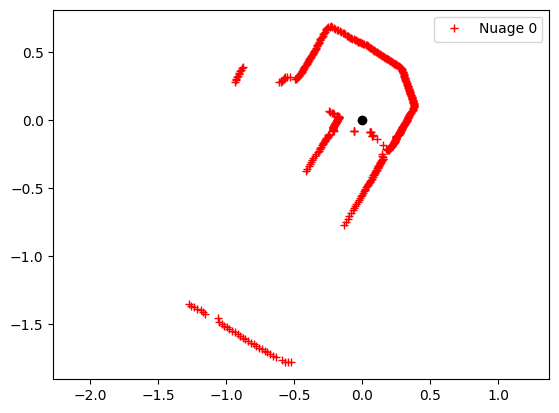

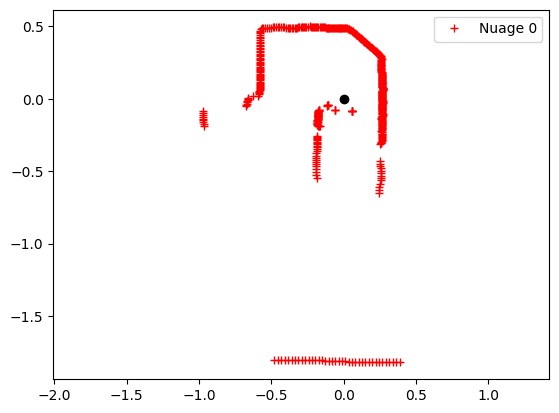

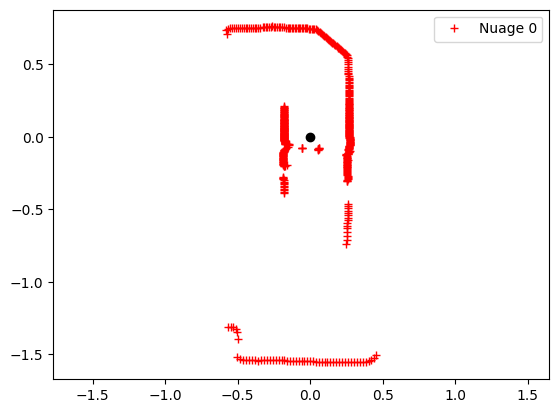

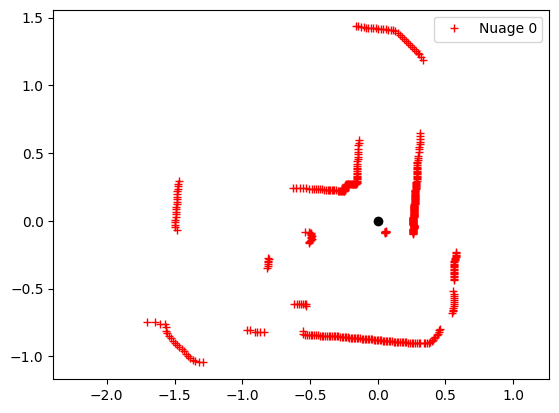

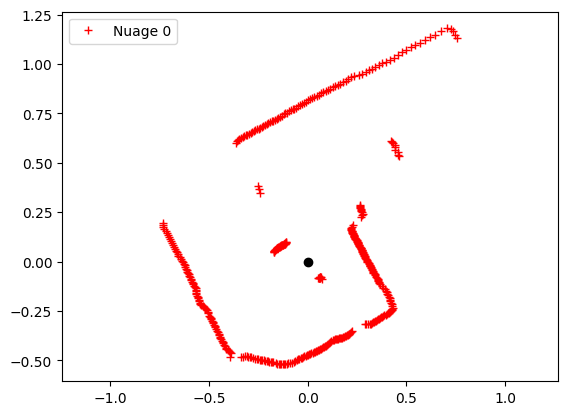

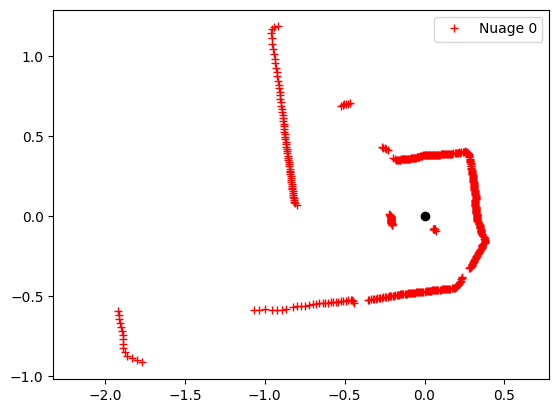

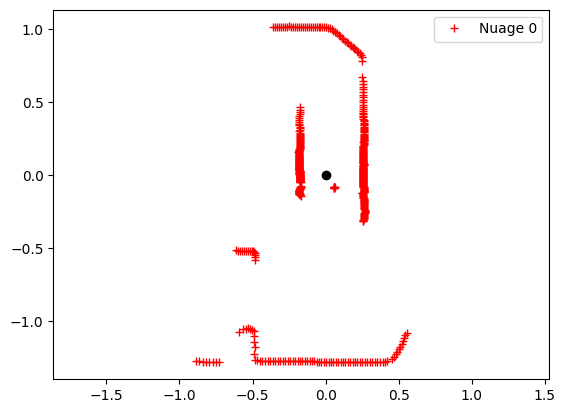

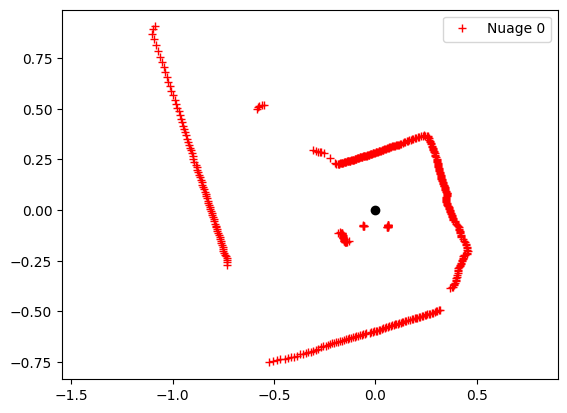

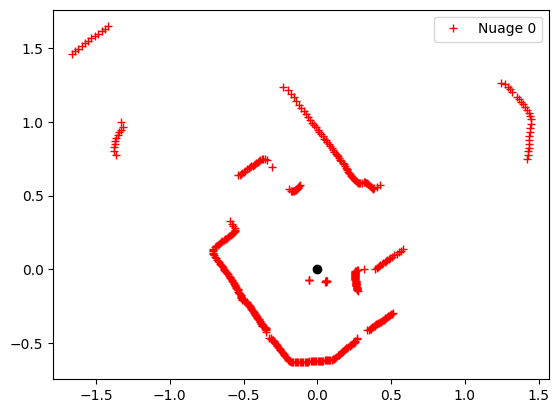

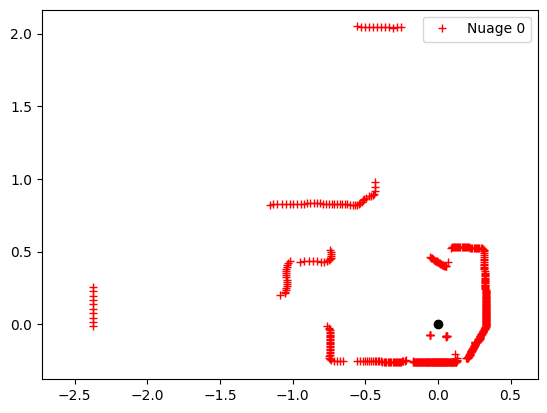

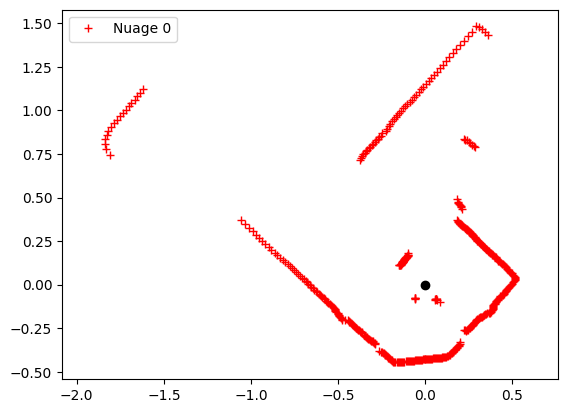

In [14]:
for lidar_path in lidar_paths:
    data = pickle.load(open(lidar_path, 'rb'))
    plot_point_clouds([lidar_to_3d_homogeneous_matrix(data)])

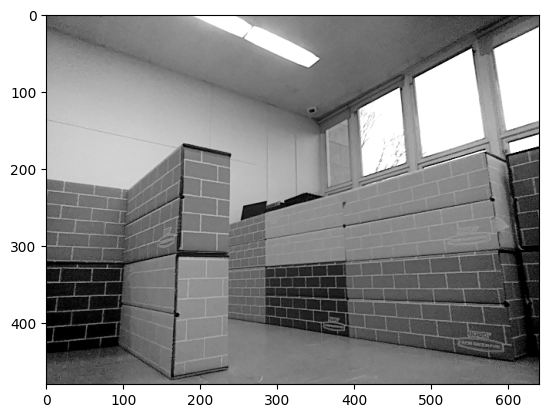

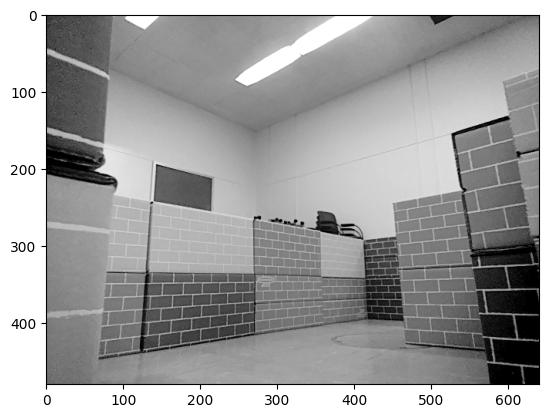

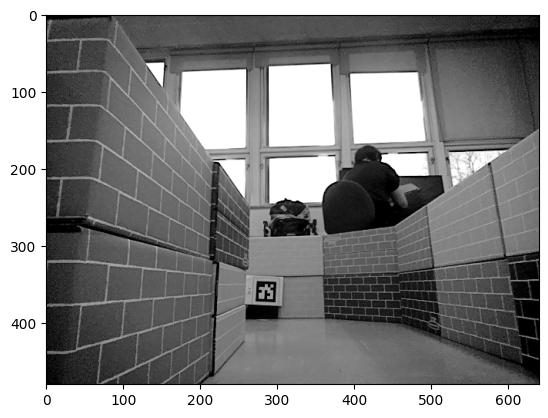

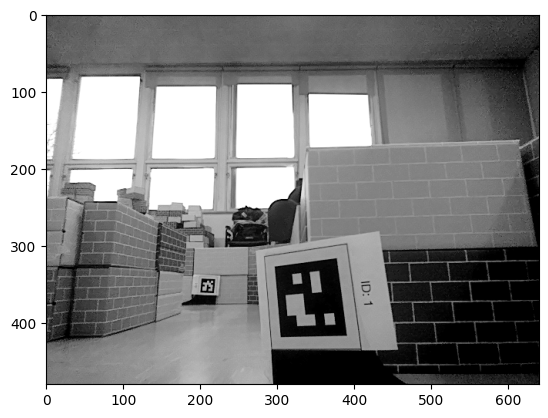

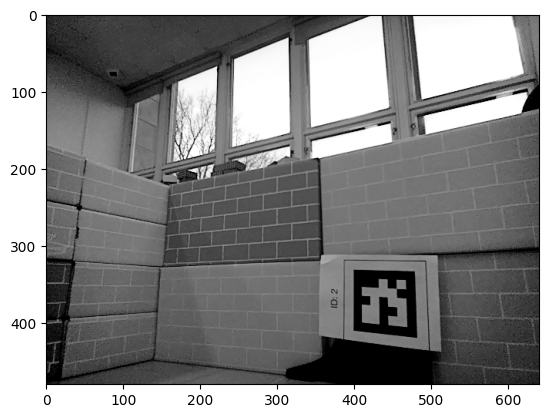

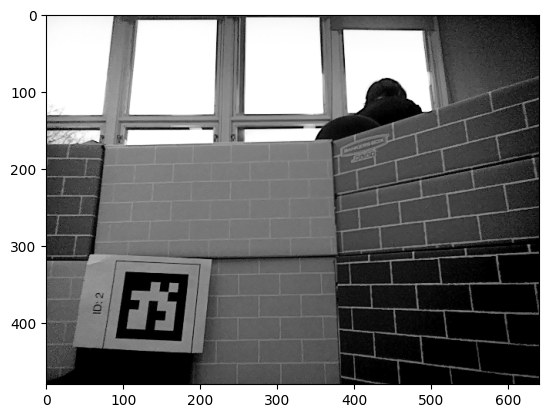

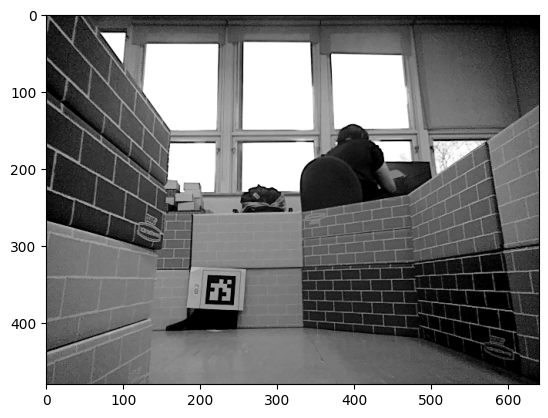

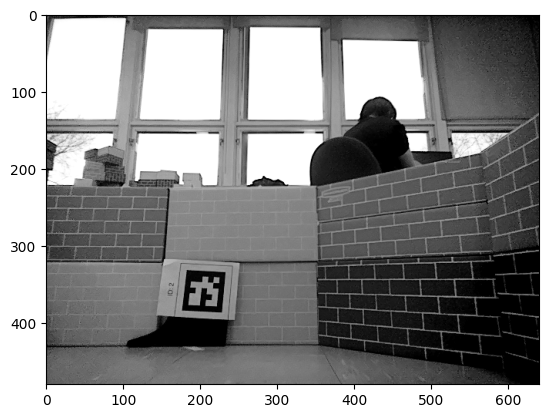

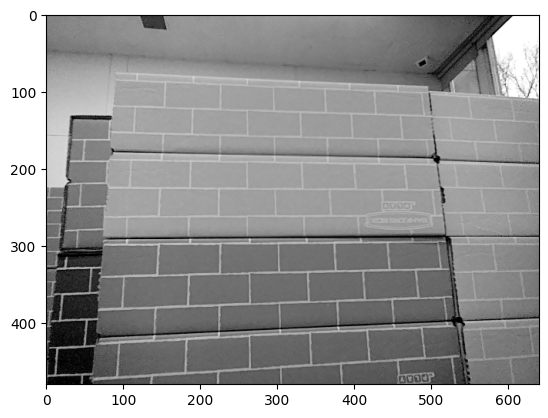

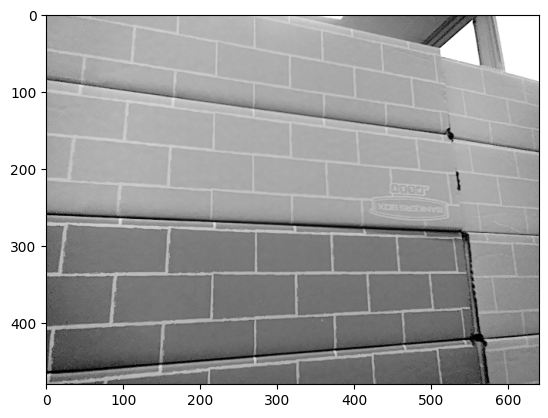

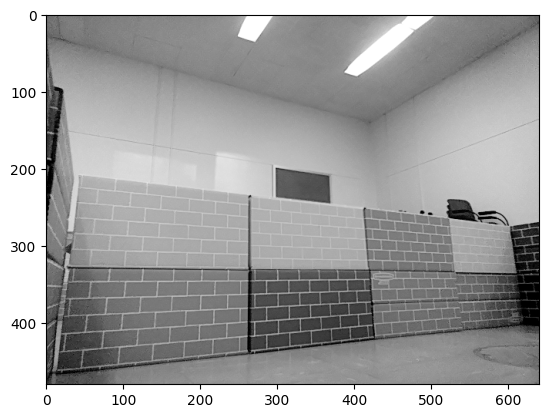

In [16]:
for oak_path in oak_paths:
    data = pickle.load(open(oak_path, 'rb'))
    plt.imshow(data['data'], cmap='gray')
    plt.show()

In [21]:
for imu_path in imu_paths[1:10]:
    print(imu_path)
    data = pickle.load(open(imu_path, 'rb'))
    print(data)

data/imu/imu_1731694457029741760.pkl
{'rgx': -0.011724349111318588, 'rgy': 0.009059724397957325, 'rgz': -0.004396630916744471, 'en_odom_l': 5.484323024749756, 'en_odom_r': 3.383225917816162, 'timestamp': 'builtin_interfaces.msg.Time(sec=1731694457, nanosec=24915232)'}
data/imu/imu_1731694457030131232.pkl
{'rgx': -0.011724349111318588, 'rgy': 0.009059724397957325, 'rgz': -0.004396630916744471, 'en_odom_l': 5.484323024749756, 'en_odom_r': 3.383225917816162, 'timestamp': 'builtin_interfaces.msg.Time(sec=1731694457, nanosec=24915232)'}
data/imu/imu_1731694457030231648.pkl
{'rgx': -0.011724349111318588, 'rgy': 0.009059724397957325, 'rgz': -0.004396630916744471, 'en_odom_l': 5.484323024749756, 'en_odom_r': 3.383225917816162, 'timestamp': 'builtin_interfaces.msg.Time(sec=1731694457, nanosec=24915232)'}
data/imu/imu_1731694457030315712.pkl
{'rgx': -0.011724349111318588, 'rgy': 0.009059724397957325, 'rgz': -0.004396630916744471, 'en_odom_l': 5.484323024749756, 'en_odom_r': 3.383225917816162, 't